**A little background** :
After recording the electric fields and the magnetic fields at the surface, we process them and estimate the transfer function in frequency domain. These transfer functions are complex qunatities and we split them into amplitude (called apparent resistivity in the MT community) and phase. Therefore, at any station, we have apparent resistivity $\rho_a$ and phase $\phi$ observed at different frequencies.
As an eg., if we have the data at 50 different frequencies, we have $\rho_a$ as a 50-element vector and the same for $\phi$. We combine them to form
$$
y = [\rho_a \quad \phi]
$$



Without going into the derivation, this data is observed for a particular conductivity structure $x$. We can solve the governing PDEs to obtain the above transfer functions. Fortunately, in 1D we have a sort of an analytical soln and it's easy to do the following mapping:
$$
F : x \rightarrow y
$$

We want to solve the inverse problem, that is, for a given realization of data $y_{obs}$, we want to infer $x$. This inverse problem is ill-posed and suffers from non-uniqueness. For the sake of completeness, we solve the following optimization problem:
$$
\underset{x}{\operatorname{argmin}} \; |(y_{obs} - F(x))|_2^2 + \mu L|x|_2^2
$$
where $L$ is usually the derivative matrix.

The Bayesian perspective is to obtain the posterior :
$$
p(x|y_{obs}) \propto p(y_{obs}|x) p(x)
$$

This is our objective : obtaining the posterior on $x$.

**Generative AI** :
One objective of generative modeling frameworks (GANs, Normalizing Flows, VAEs, Diffusion models) is to learn a distribution and generate samples from it. An example of generative models would be to learn a distribution of cat images and generate another image of a cat.

The conditional variants of the same, learn to generate samples given a certain distribution. An example of the conditional generative models would be to generate a better quality image given a noisy/ low resolution image. We can generate multiple images for a given input image and obtain a posterior distribution of the better quality image.

# Objective
The hope is to learn a conditional model that, when given a data $y_{obs}$, generates a family of models that fit the data.

**Some additional notes** :
* I didn't talk about errors in data but they have a big hand, eg. You want to constrain the posterior on $x_1 + x_2 = y$ such that $x_1 = x_2$. If errors are small, i.e., $y_{obs} = 4 \pm 0.01$, $x_1, x_2$ would be bound tight, but if errors are large, i.e., $y_{obs} = 4 \pm 1$, $x_1, x_2$ will have wider posteriors.
* I did not mention much about frequencies but simple physics tells us the higher frequencies attenuate faster and therefore provide more information on shallow structure and vice versa for shorter frequencies. *In principle*, you can get the same vector $y_{obs}$ from two sites but if they operate on different frequencies, they are not inferring the same conductivity distribution.
* We are employing analytical solution in 1D, which does not exist in 2D and 3D. It would be nice to use an FD solver, even for 1D, which shows proof of concept for the PDE.

In [1]:
!pip install gdown

In [2]:
!gdown -O 'data_mt.jld2' 1hxL-_UtuQ1wDmtaX9aJui7-tBRoXAgTm

Downloading...
From: https://drive.google.com/uc?id=1hxL-_UtuQ1wDmtaX9aJui7-tBRoXAgTm
To: /content/data_mt.jld2
100% 8.92M/8.92M [00:00<00:00, 47.3MB/s]


In [3]:
import h5py
import numpy as np

In [4]:
with h5py.File('data_mt.jld2', 'r') as f:
    keys_ = list(f.keys())
    data_appres = np.array(f['data_appres'])
    data_phase = np.array(f['data_phase'])
    x = np.array(f['data_m'])
    omega_grid = np.array(f['ω_grid'])
    mu_vec = np.array(f['μ_vec'])

In [5]:
omega_grid

array([6.2831854e+02, 4.9909116e+02, 3.9644220e+02, 3.1490521e+02,
       2.5013811e+02, 1.9869177e+02, 1.5782648e+02, 1.2536603e+02,
       9.9581779e+01, 7.9100616e+01, 6.2831852e+01, 4.9909115e+01,
       3.9644218e+01, 3.1490522e+01, 2.5013811e+01, 1.9869177e+01,
       1.5782648e+01, 1.2536603e+01, 9.9581776e+00, 7.9100618e+00,
       6.2831855e+00, 4.9909115e+00, 3.9644220e+00, 3.1490524e+00,
       2.5013812e+00, 1.9869176e+00, 1.5782648e+00, 1.2536603e+00,
       9.9581778e-01, 7.9100615e-01, 6.2831855e-01, 4.9909115e-01,
       3.9644220e-01, 3.1490523e-01, 2.5013810e-01, 1.9869177e-01,
       1.5782648e-01, 1.2536603e-01, 9.9581778e-02, 7.9100616e-02,
       6.2831856e-02, 4.9909115e-02, 3.9644219e-02, 3.1490523e-02,
       2.5013812e-02, 1.9869177e-02, 1.5782649e-02, 1.2536603e-02,
       9.9581778e-03, 7.9100616e-03, 6.2831854e-03, 4.9909116e-03,
       3.9644218e-03, 3.1490522e-03, 2.5013811e-03, 1.9869176e-03,
       1.5782648e-03, 1.2536603e-03, 9.9581771e-04, 7.9100614e

In [6]:
data_appres.shape

(10000, 61)

In [7]:
data_phase.shape

(10000, 61)

In [8]:
x.shape

(10000, 50)

In [31]:
print(data_appres[120])
print(data_phase[120])


[15.335777   15.584377   15.90236    16.21544    16.446545   16.532288
 16.44141    16.182388   15.794085   15.32884    14.8402405  14.376051
 13.970784   13.638064   13.367577   13.127939   12.872845   12.549304
 12.109363   11.524477   10.796628    9.958853    9.0634      8.163993
  7.301689    6.499529    5.7650247   5.0963435   4.4883275   3.936271
  3.4371912   2.9894168   2.5915928   2.2418594   1.937496    1.6749659
  1.4501803   1.2588187   1.0966047   0.95950335  0.8438382   0.74634427
  0.6641766   0.5948903   0.53640646  0.48697028  0.44510874  0.4095901
  0.37938708  0.3536442   0.33164966  0.31281117  0.2966357   0.28271252
  0.27069888  0.26030836  0.25130114  0.24347596  0.23666352  0.23072107
  0.22552788]
[45.448677 45.019146 44.921154 45.173485 45.739155 46.53013  47.42688
 48.310623 49.091045 49.71638  50.17233  50.483234 50.714573 50.964928
 51.34495  51.953266 52.857628 54.08116  55.593555 57.312164 59.118103
 60.88531  62.512367 63.943985 65.17433  66.23357  67.16

In [9]:
mu_vec.shape

(10000,)

In [10]:
data_phase

array([[21.61603 , 22.931587, 25.230162, ..., 40.322384, 40.777267,
        41.193188],
       [47.90693 , 48.482365, 49.042118, ..., 45.339146, 45.30179 ,
        45.26859 ],
       [45.84329 , 45.64911 , 45.219097, ..., 46.55551 , 46.39198 ,
        46.245094],
       ...,
       [44.957867, 44.492016, 43.83228 , ..., 45.145752, 45.13024 ,
        45.11635 ],
       [59.709747, 59.14241 , 59.08873 , ..., 56.45357 , 55.616882,
        54.80376 ],
       [39.468388, 38.78762 , 38.698353, ..., 14.48943 , 14.847454,
        15.387113]], dtype=float32)

`data_appres` and `data_phase` constitute the data, i.e., the `y` part and `x` consists the conductivity model (values are in log-scale, which again is a conventional wisdom from MT community that conductivity on log-scale behave better). `data_appres` also contains the values which vary on the same scale as conductivity, so if you want, you can convert them to log-scale.

In the above, I have 10,000 samples, and for $x \in \mathbb{R}^m$ and $y \in \mathbb{R}^n$, we have `m = 50`, `n=122`, 61 each from appres and phase.

# Initialize Dataset

Initialize the MT dataset with a prior X and a posterior Y consisting of the resistivity and phase concatenated

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader

class mt_dataset(Dataset):
    def __init__(self, x: np.ndarray, y_appres: np.ndarray, y_phase: np.ndarray, device='cpu'):
        #convert from double to float
        self.y_appres_tensor = torch.from_numpy(y_appres).float().to(device)
        self.y_phase_tensor = torch.from_numpy(y_phase).float().to(device)
        self.x_tensor = torch.from_numpy(x).float().to(device)

        self.n_samples, self.dim_x = self.x_tensor.shape
        self.num_freqs = self.y_appres_tensor.shape[1]

        # Concatenate the appres and phase to form y
        self.y = torch.cat((self.y_appres_tensor, self.y_phase_tensor), axis=1)
        self.x = self.x_tensor
        self.device = device

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.y[idx, :], self.x[idx, :]





# Model Implementation

Define a cosine beta scheduler as a utility function for the conditional diffusion model

In [12]:
import math
def cosine_beta_schedule(T, s=0.008, device=None):
    """
    Utility fxn for a cosine beta scheduler for the diffusion model
    """
    steps = T + 1
    x = torch.linspace(0, T, steps, device=device)
    alphas_cumprod = torch.cos(((x / T) + s) / (1 + s) * math.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, 0.0001, 0.9999)


Implement a cross-attention block to condition x on y.



In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class CrossAttention1D(nn.Module):
    """
    Lightweight cross-attention for 1-D diffusion models.

    x: (B, N, C)  - latent sequence (queries)
    y: (B, M, D)  - conditioning sequence (keys/values)
    Output: same shape as x
    """
    def __init__(self, dim_x, dim_y, dim_out, n_heads=4):
        super().__init__()
        self.n_heads = n_heads
        self.head_dim = dim_out // n_heads

        # Linear projections
        self.to_q = nn.Linear(dim_x, dim_out)
        self.to_k = nn.Linear(dim_y, dim_out)
        self.to_v = nn.Linear(dim_y, dim_out)

        self.out_proj = nn.Linear(dim_out, dim_out)

    def forward(self, x, y):
        """
        Args:
            x (B, N, C)
            y (B, M, D)
        Returns:
            (B, N, dim_out)
        """
        B, N, _ = x.shape
        _, M, _ = y.shape

        # Project Q, K, V
        q = self.to_q(x)              # (B, N, dim_out)
        k = self.to_k(y)              # (B, M, dim_out)
        v = self.to_v(y)              # (B, M, dim_out)

        # Reshape into heads
        q = q.view(B, N, self.n_heads, self.head_dim).transpose(1, 2)
        k = k.view(B, M, self.n_heads, self.head_dim).transpose(1, 2)
        v = v.view(B, M, self.n_heads, self.head_dim).transpose(1, 2)
        # shapes: (B, heads, N/M, head_dim)

        # Scaled dot-product attention
        attn = torch.matmul(q, k.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn = attn.softmax(dim=-1)

        out = torch.matmul(attn, v)  # (B, heads, N, head_dim)

        # Merge heads
        out = out.transpose(1, 2).reshape(B, N, self.n_heads * self.head_dim)

        # Final projection
        return self.out_proj(out)


Conditioning block using cross-attention plus the residuals of a small feed-forward layer to condition the prior x on the posterior y.

In [14]:
class CondBlock(nn.Module):
    """
    Coniditioning block
    """
    def __init__(self, dim_x, dim_y):
        super().__init__()
        self.cross_attn = CrossAttention1D(dim_x, dim_y, dim_x)

        #simple feed-forward layer after attention
        self.ff = nn.Sequential(
            nn.Linear(dim_x, dim_x),
            nn.ReLU(),
            nn.Linear(dim_x, dim_x)
        )

    def forward(self, x, y):
        x = x + self.cross_attn(x, y)   #residual cross-attention
        x = x + self.ff(x)              #small MLP
        return x


Define the `SinusoidalPositionalEmbedding` class for encoding diffusion timesteps and a `ResBlock` class, which will be *a* simplified residual block for feature processing.

These will be used as modules in the U-Net underlying the conditional diffusion module.


In [15]:
class SinusoidalPositionalEmbedding(nn.Module):
    """
    Encodes information about the timestep (diffusion step) in a sinusoidal fashion.
    Used for adding positional encodings to the diffusion model's U-Net.
    """
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, timestep):
        device = timestep.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = timestep[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings


class ResBlock(nn.Module):
    """
    A simplified Residual Block used within the U-Net architecture.
    """
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.norm1 = nn.GroupNorm(8, out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.norm2 = nn.GroupNorm(8, out_channels)

        if in_channels != out_channels:
            self.residual_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1)
        else:
            self.residual_conv = nn.Identity()

    def forward(self, x):
        h = self.conv1(x)
        h = self.norm1(h)
        h = self.relu(h)
        h = self.conv2(h)
        h = self.norm2(h)
        h = self.relu(h)

        return h + self.residual_conv(x)

Implements main U-Net in 1-dimension with downsampling and upsampling using convolutions and interpolations.





In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class Unet1D(nn.Module):
    def __init__(self, x_dim: int, y_dim: int, time_emb_dim: int = 128, base_channels: int = 64, channel_mults: list = None):
        super().__init__()
        if channel_mults is None:
            channel_mults = [1, 2, 4] # Multipliers for base_channels at each resolution

        self.x_dim = x_dim
        self.y_dim = y_dim
        self.time_emb_dim = time_emb_dim

        # Timestep embedding
        self.time_emb = SinusoidalPositionalEmbedding(time_emb_dim)
        # Linear projection for conditioning data `y_cond` to match `t_emb` dimension
        self.y_proj = nn.Linear(y_dim, time_emb_dim)

        # Initial convolution to transform input `x` from 1 channel to `base_channels`
        # Input `x` will be (batch_size, 1, x_dim)
        self.initial_conv = nn.Conv1d(1, base_channels, kernel_size=3, padding=1)

        self.downs = nn.ModuleList()
        self.ups = nn.ModuleList()

        num_resolutions = len(channel_mults)

        # Downsampling path
        in_channels = base_channels
        for i in range(num_resolutions):
            out_channels = base_channels * channel_mults[i]
            self.downs.append(nn.ModuleList([
                ResBlock(in_channels, out_channels), # Process features
                CondBlock(out_channels, time_emb_dim), # Cross-attention conditioning
                nn.Conv1d(out_channels, out_channels, kernel_size=2, stride=2) # Downsample spatial dimension
            ]))
            in_channels = out_channels # Update channels for the next block

        # Bottleneck (deepest part of the U-Net)
        bottleneck_channels = base_channels * channel_mults[-1]
        self.mid_res = ResBlock(bottleneck_channels, bottleneck_channels)
        self.mid_cond = CondBlock(bottleneck_channels, time_emb_dim)

        # Upsampling path
        for i in reversed(range(num_resolutions)):
            current_level_channels = base_channels * channel_mults[i] # Target channels for this level
            # Input channels for the upsampling layer come from the previous deeper stage
            # (bottleneck or output of ResBlock from previous upsampling stage)
            prev_level_channels = base_channels * channel_mults[i+1] if i < num_resolutions - 1 else bottleneck_channels

            self.ups.append(nn.ModuleList([
                nn.ConvTranspose1d(prev_level_channels, current_level_channels, kernel_size=2, stride=2), # Upsample spatial dimension and reduce channels
                ResBlock(current_level_channels * 2, current_level_channels), # Process concatenated features (upsampled + skip)
                CondBlock(current_level_channels, time_emb_dim) # Cross-attention conditioning
            ]))

        # Final convolution to output 1 channel, matching the input `x`'s initial channel dimension
        self.final_conv = nn.Conv1d(base_channels, 1, kernel_size=3, padding=1)

    def forward(self, x: torch.Tensor, timestep: torch.Tensor, y_cond: torch.Tensor) -> torch.Tensor:
        """
        Forward pass for the Unet1D model.

        Args:
            x (torch.Tensor): Input latent variable (e.g., noisy conductivity model), shape (batch_size, x_dim).
            timestep (torch.Tensor): Current diffusion timestep, shape (batch_size,).
            y_cond (torch.Tensor): Conditioning data (e.g., observed apparent resistivity and phase), shape (batch_size, y_dim).

        Returns:
            torch.Tensor: Predicted noise, same shape as input x (batch_size, x_dim).
        """
        # Generate sinusoidal positional embedding for the timestep
        t_emb = self.time_emb(timestep) # (B, time_emb_dim)

        # Combine projected y_cond with t_emb to form the conditioning vector for CondBlock
        cond_vec = self.y_proj(y_cond) + t_emb # (B, time_emb_dim)
        cond_vec = cond_vec.unsqueeze(1) # Reshape to (B, 1, time_emb_dim) for CondBlock's `y` input

        # Reshape input `x` from (B, x_dim) to (B, 1, x_dim) to be compatible with Conv1d
        x = x.unsqueeze(1) # (B, 1, x_dim)

        # Initial feature projection
        x = self.initial_conv(x) # (B, base_channels, x_dim)

        skips = [] # List to store features for skip connections

        # Downsampling path
        for res_block, cond_block, down_conv in self.downs:
            x = res_block(x) # Process features with a residual block
            skips.append(x) # Store the output before downsampling for skip connections

            # Apply cross-attention conditioning
            x_for_cond = x.permute(0, 2, 1) # Reshape x from (B, C, L) to (B, L, C) for CondBlock
            x = cond_block(x_for_cond, cond_vec).permute(0, 2, 1) # Apply conditioning and permute back

            x = down_conv(x) # Downsample the spatial dimension

        # Bottleneck path
        x = self.mid_res(x)
        x_for_cond = x.permute(0, 2, 1)
        x = self.mid_cond(x_for_cond, cond_vec).permute(0, 2, 1)

        # Upsampling path
        for up_conv, res_block, cond_block in self.ups:
            # Upsample the current features
            x = up_conv(x)

            # Retrieve corresponding skip connection features
            skip_features = skips.pop()

            # Ensure spatial dimensions match for concatenation (important if x_dim is not a perfect power of 2)
            if x.shape[-1] != skip_features.shape[-1]:
                x = F.interpolate(x, size=skip_features.shape[-1], mode='nearest')

            # Concatenate upsampled features with skip connection features
            x = torch.cat([x, skip_features], dim=1)

            x = res_block(x) # Process concatenated features
            # Apply cross-attention conditioning
            x_for_cond = x.permute(0, 2, 1)
            x = cond_block(x_for_cond, cond_vec).permute(0, 2, 1)

        # Final convolution to output the predicted noise (1 channel, original x_dim spatial size)
        x = self.final_conv(x)

        # Squeeze back to (B, x_dim) to match original input shape
        x = x.squeeze(1)

        return x

Initialize dataset

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader

# 2. Convert data to log-scale
data_appres_log = np.log(data_appres)
data_phase_log = np.log(data_phase)
# x already in log-scale

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 5. Instantiate the mt_dataset with processed (log-scaled) arrays
dataset = mt_dataset(x=x, y_appres=data_appres_log, y_phase=data_phase_log, device=device) # Use x directly as it's already log-scaled

# 6. Print the shape of dataset.x and dataset.y
print(f"Shape of dataset.x: {dataset.x.shape}")
print(f"Shape of dataset.y: {dataset.y.shape}")
print(dataset.x.device)

Shape of dataset.x: torch.Size([10000, 50])
Shape of dataset.y: torch.Size([10000, 122])
cuda:0


## Diffusion Model

Implement the overarching diffusion model & process. Set up the forward (noise addition) and reverse (denoising) steps of the diffusion process, including defining alpha/beta schedules using the `cosine_beta_schedule` and noise sampling functions.


In [18]:
import torch
import torch.nn.functional as F

class condDiffusionMT:
    def __init__(self, T, device=None):
        # Define the diffusion schedule
        self.T = T # Total diffusion steps

        self.betas = cosine_beta_schedule(T, device=device) # Utilize the previously defined cosine_beta_schedule
        self.alphas = 1. - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, axis=0)
        alphas_cumprod_prev = F.pad(self.alphas_cumprod[:-1], (1, 0), value=1.0)

        self.sqrt_recip_alphas = torch.sqrt(1.0 / self.alphas)
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod)
        self.posterior_variance = self.betas * (1. - alphas_cumprod_prev) / (1. - self.alphas_cumprod)
        self.device = device # Ensure device is stored for use in p_sample

    # Helper function to extract and reshape tensors
    def extract(self, a, t, x_shape):
        b, *_ = t.shape
        out = a.gather(-1, t)
        return out.reshape(b, *((1,) * (len(x_shape) - 1)))

    # Helper function to generate Gaussian noise
    def noise_fn(self, x):
        return torch.randn_like(x)

    def q_sample(self, x_start, t, noise=None):
        """
        Forward diffusion (noise addition) process.
        Predicts x_t given x_0, t, and noise.
        """
        if noise is None:
            noise = torch.randn_like(x_start, self.device)

        # Extract relevant terms for the current timestep t
        sqrt_alphas_cumprod_t = self.extract(self.sqrt_alphas_cumprod, t, x_start.shape)
        sqrt_one_minus_alphas_cumprod_t = self.extract(self.sqrt_one_minus_alphas_cumprod, t, x_start.shape)

        # Apply noise
        x_t = sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise
        #return as float32
        return x_t.to(torch.float32)

    def p_sample(self, model, x_t, t, y_cond):
        """
        Reverse diffusion (denoising) process.
        Predicts x_{t-1} given x_t, t, the U-Net model, and conditioning y_cond.
        """
        # Use the model to predict the noise component
        pred_noise = model(x_t, t, y_cond)

        # Extract relevant terms for the current timestep t
        betas_t = self.extract(self.betas, t, x_t.shape)
        sqrt_recip_alphas_t = self.extract(self.sqrt_recip_alphas, t, x_t.shape)
        sqrt_alphas_cumprod_t = self.extract(self.sqrt_alphas_cumprod, t, x_t.shape) # Define this variable
        sqrt_one_minus_alphas_cumprod_t = self.extract(
            self.sqrt_one_minus_alphas_cumprod, t, x_t.shape)
        posterior_variance_t = self.extract(self.posterior_variance, t, x_t.shape)

        # Calculate predicted x_0
        pred_x_0 = (x_t - sqrt_one_minus_alphas_cumprod_t * pred_noise) / sqrt_alphas_cumprod_t # Use the local variable

        # Calculate the mean of the denoising step
        mu = sqrt_recip_alphas_t * (x_t - betas_t * pred_noise / sqrt_one_minus_alphas_cumprod_t)

        # Sample x_{t-1}
        if t[0] == 0: # If at the first timestep, return the predicted x_0 directly
            return pred_x_0
        else:
            # Add random noise for sampling if not the last step
            noise = torch.randn_like(x_t, device=self.device)
            sampler = mu + torch.sqrt(posterior_variance_t) * noise
            return sampler

# Task
## Initialize Model, Optimizer, and DataLoader

Initialize the `Unet1D` model, optimize, and dataloader for `mt_dataset`. Move the model to the appropriate device (CPU/GPU).


## Initialize Model, Optimizer, and DataLoader

### Subtask:
Initialize the `Unet1D` model, an optimizer (e.g., Adam), and a `DataLoader` for the `mt_dataset`. Move the model to the appropriate device (CPU/GPU).


In [19]:
import torch.optim as optim

# 1. Determine input dimensions from the dataset
x_dim = dataset.dim_x
y_dim = dataset.y.shape[1] # Use the shape of the concatenated y for y_dim

# 2. Define the computational device
print(f"Using device: {device}")
model = Unet1D(x_dim=x_dim, y_dim=y_dim).to(device)

Using device: cuda


Define training params

In [23]:
# Set batch_size, epochs, and # of diffusion steps
batch_size = 128
epochs = 100
T = 1000

#initialize diffusion model and the UNet model
diffusion = condDiffusionMT(T, device)

# 6. Initialize the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 7. Create a DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(f"Unet1D model initialized with x_dim={x_dim}, y_dim={y_dim}")
print(f"Optimizer: {optimizer}")
print(f"DataLoader created with batch_size={batch_size}")

Unet1D model initialized with x_dim=50, y_dim=122
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
DataLoader created with batch_size=128


## Training

Implement `train` function, handling the epoch loop, batch processing, noise addition using `q_sample`, noise prediction using the `Unet1D` model, loss calculation (e.g., MSE), backpropagation, and optimizer step.


In [49]:
def train_diffusion_model(model, dataloader, optimizer, epochs, T, device):
    model.train() # Set the model to training mode
    for epoch in range(epochs):
        total_loss = 0
        for y_cond, x_start in dataloader:
            optimizer.zero_grad()

            # Move data to the specified device
            x_start = x_start.to(device)
            y_cond = y_cond.to(device)

            # Sample random timesteps for each batch item
            t = torch.randint(0, T, (x_start.shape[0],), device=device).long()

            # Generate random noise
            noise = torch.randn_like(x_start,device=device)

            # Add noise to x_start to get x_t
            x_t = diffusion.q_sample(x_start, t, noise=noise)

            # Predict the noise using the U-Net model
            predicted_noise = model(x_t, t, y_cond)

            # Calculate MSE loss between predicted noise and actual noise
            loss = F.mse_loss(predicted_noise, noise)

            # Perform backpropagation
            loss.backward()

            # Update model parameters
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    print("Training complete.")

In [ ]:
train_diffusion_model(model, dataloader, optimizer, epochs, T, device)

Epoch 1/100, Loss: 0.2563
Epoch 2/100, Loss: 0.2466
Epoch 3/100, Loss: 0.2359
Epoch 4/100, Loss: 0.2330
Epoch 5/100, Loss: 0.2241
Epoch 6/100, Loss: 0.2196
Epoch 7/100, Loss: 0.2193
Epoch 8/100, Loss: 0.2113
Epoch 9/100, Loss: 0.2133
Epoch 10/100, Loss: 0.2140
Epoch 11/100, Loss: 0.2101
Epoch 12/100, Loss: 0.2134
Epoch 13/100, Loss: 0.2102
Epoch 14/100, Loss: 0.2116
Epoch 15/100, Loss: 0.2037
Epoch 16/100, Loss: 0.2002
Epoch 17/100, Loss: 0.2063
Epoch 18/100, Loss: 0.2075
Epoch 19/100, Loss: 0.2039
Epoch 20/100, Loss: 0.1975
Epoch 21/100, Loss: 0.2024
Epoch 22/100, Loss: 0.2007
Epoch 23/100, Loss: 0.2011
Epoch 24/100, Loss: 0.2050
Epoch 25/100, Loss: 0.1982
Epoch 26/100, Loss: 0.1933
Epoch 27/100, Loss: 0.2014
Epoch 28/100, Loss: 0.1981
Epoch 29/100, Loss: 0.1969
Epoch 30/100, Loss: 0.1970
Epoch 31/100, Loss: 0.1961
Epoch 32/100, Loss: 0.1929
Epoch 33/100, Loss: 0.1984
Epoch 34/100, Loss: 0.1923
Epoch 35/100, Loss: 0.1899
Epoch 36/100, Loss: 0.1954
Epoch 37/100, Loss: 0.1940
Epoch 38/1

Save model weights, print architecture

In [ ]:
#save model weights
print(model)
PATH = "mt_conddiffusion_weights.pt"
torch.save(model.state_dict(), PATH)


Unet1D(
  (time_emb): SinusoidalPositionalEmbedding()
  (y_proj): Linear(in_features=122, out_features=128, bias=True)
  (initial_conv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (downs): ModuleList(
    (0): ModuleList(
      (0): ResBlock(
        (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (norm1): GroupNorm(8, 64, eps=1e-05, affine=True)
        (relu): ReLU()
        (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (norm2): GroupNorm(8, 64, eps=1e-05, affine=True)
        (residual_conv): Identity()
      )
      (1): CondBlock(
        (cross_attn): CrossAttention1D(
          (to_q): Linear(in_features=64, out_features=64, bias=True)
          (to_k): Linear(in_features=128, out_features=64, bias=True)
          (to_v): Linear(in_features=128, out_features=64, bias=True)
          (out_proj): Linear(in_features=64, out_features=64, bias=True)
        )
        (ff): Sequential(
          (0): Linear(

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

3435521

# Evaluation
Retrieve and load model weights

In [20]:
!gdown 1KDQyx1hZ3EfzV5Wr7tn3-40_haNi5I-r

Downloading...
From: https://drive.google.com/uc?id=1KDQyx1hZ3EfzV5Wr7tn3-40_haNi5I-r
To: /content/mt_conddiffusion_weights.pt
100% 13.8M/13.8M [00:00<00:00, 96.0MB/s]


In [21]:
state_dict = torch.load('mt_conddiffusion_weights.pt', map_location=device)
model.load_state_dict(state_dict)


<All keys matched successfully>

Preliminary evaluation (comparing samples to ground truth)

tensor([ 2.7302,  2.7463,  2.7665,  2.7860,  2.8001,  2.8053,  2.7998,  2.7839,
         2.7596,  2.7297,  2.6973,  2.6656,  2.6370,  2.6129,  2.5928,  2.5747,
         2.5551,  2.5297,  2.4940,  2.4445,  2.3792,  2.2985,  2.2042,  2.0997,
         1.9881,  1.8717,  1.7518,  1.6285,  1.5015,  1.3702,  1.2347,  1.0951,
         0.9523,  0.8073,  0.6614,  0.5158,  0.3717,  0.2302,  0.0922, -0.0413,
        -0.1698, -0.2926, -0.4092, -0.5194, -0.6229, -0.7196, -0.8094, -0.8926,
        -0.9692, -1.0395, -1.1037, -1.1622, -1.2153, -1.2633, -1.3067, -1.3459,
        -1.3811, -1.4127, -1.4411, -1.4665, -1.4893,  3.8166,  3.8071,  3.8049,
         3.8105,  3.8230,  3.8401,  3.8592,  3.8777,  3.8937,  3.9063,  3.9155,
         3.9216,  3.9262,  3.9311,  3.9386,  3.9503,  3.9676,  3.9905,  4.0181,
         4.0485,  4.0795,  4.1090,  4.1354,  4.1580,  4.1771,  4.1932,  4.2072,
         4.2196,  4.2309,  4.2410,  4.2497,  4.2566,  4.2616,  4.2644,  4.2648,
         4.2630,  4.2588,  4.2525,  4.24

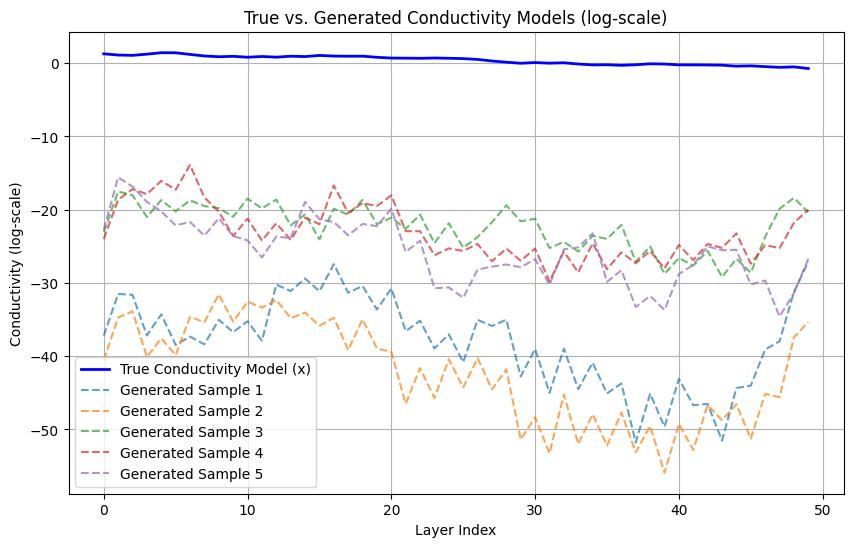

In [32]:
import matplotlib.pyplot as plt

def p_sample_loop(model, y_cond, x_shape, T, device):
    model.eval() # Set the model to evaluation mode
    with torch.no_grad():
        b = y_cond.shape[0]
        # Start with random noise (x_T)
        x_t = torch.randn(x_shape, device=device)

        for i in reversed(range(T)):
            t = torch.full((b,), i, device=device, dtype=torch.long)
            # Use the p_sample function to denoise one step
            x_t = diffusion.p_sample(model, x_t, t, y_cond)

        return x_t


# --- Evaluation and Visualization ---

num_samples_to_generate = 5 # Number of conductivity models to generate per y_cond

# Pick a random sample from the dataset for conditioning

#random_idx = torch.randint(0, len(dataset), (1,)).item()
random_idx = 120 #standardize index
y_cond_true, x_true = dataset[random_idx]
print(y_cond_true, x_true)
# Unsqueeze y_cond_true to match batch dimension (batch_size=1 for a single sample)
y_cond_true_batch = y_cond_true.unsqueeze(0).to(device)
x_true_batch = x_true.unsqueeze(0).to(device)

print(f"Selected true x (conductivity model) shape: {x_true.shape}")
print(f"Selected true y (data) shape: {y_cond_true.shape}")

# Generate samples
generated_x_samples = []
for _ in range(num_samples_to_generate):
    # The p_sample_loop expects the x_shape for the initial noise generation.
    # It should be (1, x_dim) since we are generating one sample at a time.
    generated_x = p_sample_loop(model, y_cond_true_batch, (1, x_dim), T, device)
    generated_x_samples.append(generated_x.squeeze(0).cpu().numpy()) # Remove batch dim and move to CPU

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_true.cpu().numpy(), label='True Conductivity Model (x)', color='blue', linewidth=2)

for i, gen_x in enumerate(generated_x_samples):
    plt.plot(gen_x, linestyle='--', alpha=0.7, label=f'Generated Sample {i+1}')

plt.title('True vs. Generated Conductivity Models (log-scale)')
plt.xlabel('Layer Index')
plt.ylabel('Conductivity (log-scale)')
plt.legend()
plt.grid(True)
plt.show()

Generating 32 samples for evaluation... (this may take a moment)

Average KL Divergence across all 50 dimensions: 2.5858


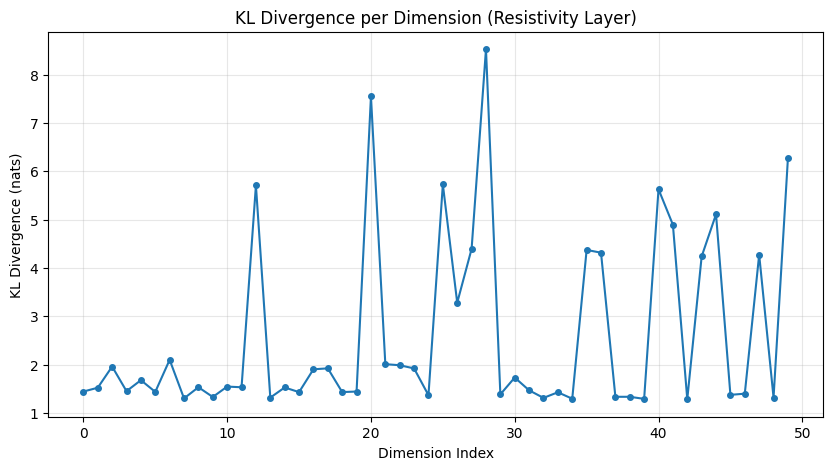

In [33]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

def compute_kl_divergence(model, dataset, batch_size=32, T=1000, device='cpu', num_bins=50):
    """
    Computes the KL divergence between the distribution of true x values and
    generated x values (conditioned on y), averaged across all dimensions.
    """
    # 1. Get a batch of data (True samples)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    y_cond_batch, x_true_batch = next(iter(dataloader))

    y_cond_batch = y_cond_batch.to(device)
    x_true_batch = x_true_batch.to(device)

    # Shape for noise generation matches the batch
    x_shape = x_true_batch.shape

    print(f"Generating {batch_size} samples for evaluation... (this may take a moment)")

    # 2. Generate samples using the diffusion model
    # We use the p_sample_loop defined in the previous cells
    x_gen_batch = p_sample_loop(model, y_cond_batch, x_shape, T, device)

    # Convert to numpy for analysis
    x_true = x_true_batch.cpu().numpy()
    x_gen = x_gen_batch.cpu().numpy()

    kl_divs = []

    # 3. Compute KL divergence for each dimension (layer)
    for i in range(x_true.shape[1]):
        # Determine bin range based on min/max of both sets to ensure coverage
        min_val = min(x_true[:, i].min(), x_gen[:, i].min())
        max_val = max(x_true[:, i].max(), x_gen[:, i].max())
        bins = np.linspace(min_val, max_val, num_bins)

        # Compute histograms (counts)
        p_hist, _ = np.histogram(x_true[:, i], bins=bins, density=False)
        q_hist, _ = np.histogram(x_gen[:, i], bins=bins, density=False)

        # Convert to probabilities
        p_probs = p_hist / (p_hist.sum() + 1e-10)
        q_probs = q_hist / (q_hist.sum() + 1e-10)

        # Add epsilon to avoid log(0)
        epsilon = 1e-10
        p_probs += epsilon
        q_probs += epsilon

        # Renormalize
        p_probs /= p_probs.sum()
        q_probs /= q_probs.sum()

        # Calculate KL(True || Generated)
        kl = entropy(p_probs, q_probs)
        kl_divs.append(kl)

    mean_kl = np.mean(kl_divs)
    return mean_kl, kl_divs

# Run the evaluation
# Note: batch_size is set to 32 to keep execution time reasonable on CPU.
kl_val, kl_per_dim = compute_kl_divergence(model, dataset, batch_size=32, T=T, device=device)
print(f"\nAverage KL Divergence across all {len(kl_per_dim)} dimensions: {kl_val:.4f}")

# Plot the KL divergence per dimension
plt.figure(figsize=(10, 5))
plt.plot(kl_per_dim, marker='o', linestyle='-', markersize=4)
plt.title('KL Divergence per Dimension (Resistivity Layer)')
plt.xlabel('Dimension Index')
plt.ylabel('KL Divergence (nats)')
plt.grid(True, alpha=0.3)
plt.show()

In [34]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F

def compute_mse(model, dataset, batch_size=32, T=1000, device='cpu'):
    """
    Computes the Mean Squared Error between true x and generated x.
    """
    # 1. Get a batch of data
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    y_cond_batch, x_true_batch = next(iter(dataloader))

    y_cond_batch = y_cond_batch.to(device)
    x_true_batch = x_true_batch.to(device)

    print(f"Generating {batch_size} samples for MSE computation... (T={T})")

    # 2. Generate samples
    # x_shape matches x_true_batch: (batch_size, x_dim)
    x_gen_batch = p_sample_loop(model, y_cond_batch, x_true_batch.shape, T, device)

    # 3. Compute MSE
    # Calculate MSE per sample (averaging over dimensions)
    mse_per_sample = F.mse_loss(x_gen_batch, x_true_batch, reduction='none').mean(dim=1)

    # Average over the batch
    total_mean_mse = mse_per_sample.mean().item()

    return total_mean_mse, mse_per_sample

# Run the calculation
mse_val, mse_individual = compute_mse(model, dataset, batch_size=32, T=T, device=device)

print(f"Mean Squared Error (averaged over batch): {mse_val:.6f}")
print(f"Min MSE in batch: {mse_individual.min().item():.6f}")
print(f"Max MSE in batch: {mse_individual.max().item():.6f}")

Generating 32 samples for MSE computation... (T=1000)
Mean Squared Error (averaged over batch): 2482.251465
Min MSE in batch: 0.026648
Max MSE in batch: 18450.386719


In [35]:
def p_sample_loop_batch(model, y_cond, x_shape, T, device, num_samples=1):
    """
    Generate `num_samples` samples per conditional input y_cond using a
    conditional diffusion model.

    Args:
        model:          conditional diffusion model
        y_cond:         (b, y_dim) tensor of conditioning inputs
        x_shape:        tuple shape of *one* sample, e.g. (b, x_dim)
                        NOTE: b is ignored; inferred from y_cond
        T:              total diffusion steps
        device:         torch device
        num_samples:    number of independent samples per y_cond

    Returns:
        x_t: tensor of shape (b, num_samples, x_dim)
    """
    model.eval()
    with torch.no_grad():
        b = y_cond.shape[0]

        # Expand y_cond to (b * num_samples, y_dim)
        y_cond_expanded = y_cond.repeat_interleave(num_samples, dim=0)

        # Create initial noise: (b * num_samples, x_dim, ...)
        x_single_shape = (num_samples * b,) + tuple(x_shape[1:])
        x_t = torch.randn(x_single_shape, device=device)

        # Reverse diffusion (denoising) loop
        for i in reversed(range(T)):
            print(i)
            t = torch.full((b * num_samples,), i,
                           device=device, dtype=torch.long)

            x_t = diffusion.p_sample(
                model,
                x_t,
                t,
                y_cond_expanded
            )

        # Reshape back to (b, num_samples, ...)
        out_shape = (b, num_samples) + tuple(x_shape[1:])
        x_t = x_t.view(out_shape)

        return x_t


In [36]:
# Generate 10k samples to generate a visualization with

generated_x_samples = []
num_samples_to_generate = 10000

mass_samples = p_sample_loop_batch(model, y_cond_true_batch,
 (num_samples_to_generate, x_dim), T, device, num_samples = num_samples_to_generate)


999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
753
752
751
750


In [37]:
mass_samples.shape
torch.save(mass_samples, 'mass_samples.pt')


# Sample Evaluation

In [ ]:
!gdown 1l_R6VyDk7YI6VRFbq2o0qp34hiy6Ygka

Downloading...
From: https://drive.google.com/uc?id=1l_R6VyDk7YI6VRFbq2o0qp34hiy6Ygka
To: /content/mass_samples.pt
100% 2.00M/2.00M [00:00<00:00, 142MB/s]


In [38]:
sample_idx = 120 # idx from which the samples were generated
mass_samples = torch.load('mass_samples.pt', map_location=device)
mass_samples.shape

torch.Size([1, 10000, 50])

In [39]:
# compare mean of samples to ground truth
y, x_actual = dataset[sample_idx]
print(x_actual.shape)
gen_mean = torch.squeeze(torch.mean(mass_samples, dim=1))
print(gen_mean.shape)

#compute NRMSE
squared_differences = (gen_mean - x_actual)**2
mean_squared_difference = torch.mean(squared_differences)
nrmse = (mean_squared_difference**0.5) / (max(x_actual) - min(x_actual))
nrmse

torch.Size([50])
torch.Size([50])


tensor(13.1711, device='cuda:0')

# Physics-Informed Loss

The governing PDE is Maxwell's decoupled equation with the quasi-static approximation, $\nabla^2 u - iω\mu_0 σ u = 0$, where $\omega$ (given by data) is the angular frequency, $\mu_0$ is a constant magnetic permeability of free space, u(z) is the EM component (x) for depth level z, and $\sigma$ being
electrical conducivity, or $1/\rho$.

Thus, for physics-informed diffusion loss following the approach outlined by Bastek et al. (2025), we consider the system of PDE residual functions $f_n = \nabla^2 u - iω_n\mu_0 σ_n u$, for all $n \in N$ frequencies.


In [ ]:
def compute_laplacian(x, fx):
    """
    Helper function computing the Laplacian using the central difference formula
    and providing scalar input-output pairs.
    Inputs:
      x: B x M matrix of function inputs.
      fx: B x M matrix of function outputs.
    Returns: B x M matrix of Laplacian values
    """
    device = x.device
    B, M = x.shape #get dimensions

    laplacian = torch.zeros_like(fx,device=device)

    # Central difference for interior points
    h_forward = x[:, 2:] - x[:, 1:-1]  # h_{i+1}
    h_backward = x[:, 1:-1] - x[:, :-2]  # h_i

    # Second derivative formula for non-uniform grids
    laplacian[:, 1:-1] = 2 * (
        fx[:, :-2] / (h_backward * (h_backward + h_forward)) -
        fx[:, 1:-1] / (h_backward * h_forward) +
        fx[:, 2:] / (h_forward * (h_backward + h_forward))
    )

    # Handle boundaries with one-sided differences
    # Left boundary
    h1 = x[:, 1] - x[:, 0]
    h2 = x[:, 2] - x[:, 1]
    laplacian[:, 0] = 2 * (
        fx[:, 0] / (h1 * (h1 + h2)) -
        fx[:, 1] / (h1 * h2) +
        fx[:, 2] / (h2 * (h1 + h2))
    )

    # Right boundary
    h1 = x[:, -2] - x[:, -3]
    h2 = x[:, -1] - x[:, -2]
    laplacian[:, -1] = 2 * (
        fx[:, -3] / (h1 * (h1 + h2)) -
        fx[:, -2] / (h1 * h2) +
        fx[:, -1] / (h2 * (h1 + h2))
    )

    return laplacian


In [ ]:
MU_0 = 4 * np.pi * 1e-7

def pde_residual(u, omega, rho, mu_0 = MU_0):
  """
  Governing Maxwell's PDE rewritten as a residual function, solve for a batch of B
  samples.
  u: the field structure (B x M tensor, generally x)
  omega: angular frequency of each signal (provided in data, N/2-dim vector)
  rho: apparent resistivity of each layer. use for calculating u and sigma
    (B x N/2 matrix)
  mu_0: magnetic permeability of free space, fixed constant (float).

  Returns: B x M x N / 2 complex matrix of f_n outputs for every frequency and every depth level.
  """
  device = u.device #standardize device type
  B, M = u.size()
  num_freqs = omega.size(0) #number of frequencies, N/2
  sigma = 1 / rho #electrical conductivity (inverse of resistivity by definition)
  #take the laplacian of x with respect to depth
  #use indices for depth levels (assume linearly spaced depths)
  z = torch.arange(50, device=device).expand(B, -1).float() #B x M matrix
  #for each sample in the batch, compute laplacian with x-values from z and
  #the output values from u
  laplacians = compute_laplacian(z, u) #B-dim vector

  #expand & broadcast tensors to output dimension
  laplace_exp = torch.unsqueeze(laplacians,dim=-1).expand(-1, -1, num_freqs)  #B x M -> B x M x N / 2 matrix
  u_exp = torch.unsqueeze(u, dim=-1).expand(-1, -1, num_freqs)  #B x M -> B x M x N / 2 matrix
  omega_exp = torch.unsqueeze(torch.unsqueeze(omega, dim=0),dim=0) #N/2 -> 1 x 1 x N/2 matrix
  omega_exp = omega_exp.expand(B, M, -1) #1 x 1 x N/2 -> B x M x N / 2 matrix
  sigma_exp = torch.unsqueeze(sigma,dim=1).expand(-1, M, -1) #B x N/2 -> B x M x N / 2 matrix

  #compute & return all the outputs fo rf_n for every frequency, depth level, and sample in batch
  #1j = i
  result = laplace_exp - 1j * omega_exp * mu_0 * sigma_exp * u_exp
  return result



In [ ]:
#laplacian test w/ batch of 10 samples
z = torch.arange(50).expand(10, -1).float() #B x M matrix
u_batch = torch.tensor(x[:10, :])
laplacians = compute_laplacian(z, u_batch) #B-dim vector
print(laplacians.size())


torch.Size([10, 50])


In [ ]:
#testing f w/ 100 samples
u_batch = torch.tensor(x, device=device)
omega = torch.tensor(omega_grid, device=device)
rho_batch = torch.tensor(data_appres, device=device)
print(u_batch.size(), omega.size(), rho_batch.size())

out = pde_residual(u_batch, omega, rho_batch)
print(out.size())

torch.Size([10000, 50]) torch.Size([61]) torch.Size([10000, 61])
torch.Size([10000, 50, 61])


# Physics-Informed Diffusion Loss

We adapt Bastek et al.'s (2025) physics-informed diffusion architecture to incorporate the governing PDE into the loss calculations. Using the previously defined pde_residual function, we calculate the complex residual vector of the governing equations for each frequency $R(x)$ and compute the physics-informed loss component as $||R||^2$, seeing as $R(x) = 0$ for the ideal solution.  

In [ ]:
def train_diffusion_model_physics(model, dataloader, optimizer, epochs, T, device, lambda_phy=0.01):
    model.train() # Set the model to training mode

    # Convert omega_grid to tensor on device (assuming omega_grid is available globally)
    omega_tensor = torch.tensor(omega_grid, device=device).float()

    for epoch in range(epochs):
        total_loss = 0
        for y_cond, x_start in dataloader:
            optimizer.zero_grad()

            # Move data to the specified device
            x_start = x_start.to(device)
            y_cond = y_cond.to(device)

            # Sample random timesteps for each batch item
            t = torch.randint(0, T, (x_start.shape[0],), device=device).long()

            # Generate random noise
            noise = torch.randn_like(x_start, device=device)

            # Add noise to x_start to get x_t
            x_t = diffusion.q_sample(x_start, t, noise=noise)

            # Predict the noise using the U-Net model
            predicted_noise = model(x_t, t, y_cond)

            # Calculate MSE loss between predicted noise and actual noise
            loss_mse = F.mse_loss(predicted_noise, noise)

            #Physics informed loss component based on Bastek et al. (2025)
            #https://arxiv.org/pdf/2403.14404
            # 1. Estimate x_0 from x_t and predicted noise
            sqrt_alphas_cumprod_t = diffusion.extract(diffusion.sqrt_alphas_cumprod, t, x_start.shape)
            sqrt_one_minus_alphas_cumprod_t = diffusion.extract(diffusion.sqrt_one_minus_alphas_cumprod, t, x_start.shape)

            # x_0 = (x_t - sqrt(1-alpha_bar) * epsilon) / sqrt(alpha_bar)
            pred_x_0 = (x_t - sqrt_one_minus_alphas_cumprod_t * predicted_noise) / sqrt_alphas_cumprod_t

            # 2. Compute PDE Residual R using function f
            rho = torch.exp(y_cond[:, :61]) #convert rho back to linear scale
            residual = pde_residual(pred_x_0, omega_tensor, rho)

            #compute loss ||R||^2
            #residual is complex, compute squared magnitude
            residual_sq = torch.abs(residual)**2
            #mean over spatial and frequency dimensions
            residual_loss = residual_sq.mean(dim=(1, 2))

            # 4. Weight by t and average over batch
            loss_phy = (t.float() * residual_loss).mean()

            # Total Loss
            loss = loss_mse + lambda_phy * loss_phy

            # Perform backpropagation
            loss.backward()

            # Update model parameters
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    print("Training complete.")

In [ ]:
train_diffusion_model_physics(model, dataloader, optimizer, epochs, T, device)

Epoch 1/100, Loss: 191297916.8852
Epoch 2/100, Loss: 33697917.8587
Epoch 3/100, Loss: 6066642.9372
Epoch 4/100, Loss: 2114944.0729
Epoch 5/100, Loss: 3597718.4917
Epoch 6/100, Loss: 5879388.4458
Epoch 7/100, Loss: 4356448.5224
Epoch 8/100, Loss: 8306793.2857
Epoch 9/100, Loss: 4589923.0702
Epoch 10/100, Loss: 2307427.3876
Epoch 11/100, Loss: 1690401.1668
Epoch 12/100, Loss: 3050677.2232
Epoch 13/100, Loss: 2870469.1158
Epoch 14/100, Loss: 8884032.6748
Epoch 15/100, Loss: 1113220.2446
Epoch 16/100, Loss: 2578331.2493
Epoch 17/100, Loss: 1534476.1805
Epoch 18/100, Loss: 2048393.9572
Epoch 19/100, Loss: 1836899.2903
Epoch 20/100, Loss: 1929642.5387
Epoch 21/100, Loss: 606889.7075
Epoch 22/100, Loss: 657569.6059
Epoch 23/100, Loss: 583007.7685
Epoch 24/100, Loss: 1037311.0620
Epoch 25/100, Loss: 354221.7713
Epoch 26/100, Loss: 1490860.7391
Epoch 27/100, Loss: 2926088.7042
Epoch 28/100, Loss: 818999.8118
Epoch 29/100, Loss: 1158067.4684
Epoch 30/100, Loss: 501119.0615
Epoch 31/100, Loss: 12

In [ ]:
#save model weights
print(model)
PATH = "mt_phys_conddiffusion_weights.pt"
torch.save(model.state_dict(), PATH)


Unet1D(
  (time_emb): SinusoidalPositionalEmbedding()
  (y_proj): Linear(in_features=122, out_features=128, bias=True)
  (initial_conv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (downs): ModuleList(
    (0): ModuleList(
      (0): ResBlock(
        (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (norm1): GroupNorm(8, 64, eps=1e-05, affine=True)
        (relu): ReLU()
        (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (norm2): GroupNorm(8, 64, eps=1e-05, affine=True)
        (residual_conv): Identity()
      )
      (1): CondBlock(
        (cross_attn): CrossAttention1D(
          (to_q): Linear(in_features=64, out_features=64, bias=True)
          (to_k): Linear(in_features=128, out_features=64, bias=True)
          (to_v): Linear(in_features=128, out_features=64, bias=True)
          (out_proj): Linear(in_features=64, out_features=64, bias=True)
        )
        (ff): Sequential(
          (0): Linear(

# Physics-Informed Loss Evaluation

Load physics-informed loss weights

In [40]:
!gdown 1ke7cjTM6LZa_HE4j-JRDZ1sy6BjJ1LkC

Downloading...
From: https://drive.google.com/uc?id=1ke7cjTM6LZa_HE4j-JRDZ1sy6BjJ1LkC
To: /content/mt_phys_conddiffusion_weights.pt
100% 13.8M/13.8M [00:00<00:00, 81.9MB/s]


In [41]:
state_dict = torch.load('mt_phys_conddiffusion_weights.pt', map_location=device)
model.load_state_dict(state_dict)


<All keys matched successfully>

Sample visualization

Selected true x (conductivity model) shape: torch.Size([50])
Selected true y (data) shape: torch.Size([122])


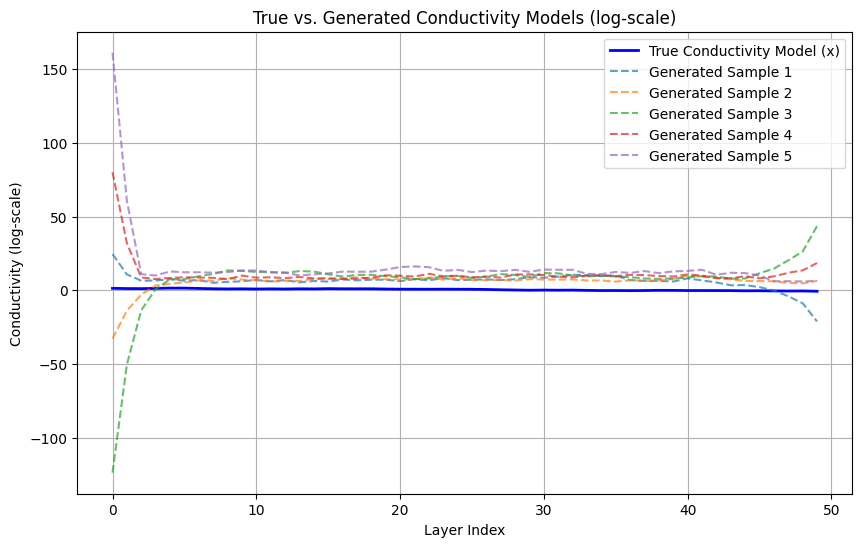

In [43]:
# --- Evaluation and Visualization ---

num_samples_to_generate = 5 # Number of conductivity models to generate per y_cond

# Pick a random sample from the dataset for conditioning
#random_idx = torch.randint(0, len(dataset), (1,)).item()
random_idx = 120
y_cond_true, x_true = dataset[random_idx]

# Unsqueeze y_cond_true to match batch dimension (batch_size=1 for a single sample)
y_cond_true_batch = y_cond_true.unsqueeze(0).to(device)
x_true_batch = x_true.unsqueeze(0).to(device)

print(f"Selected true x (conductivity model) shape: {x_true.shape}")
print(f"Selected true y (data) shape: {y_cond_true.shape}")

# Generate samples
generated_x_samples = []
for _ in range(num_samples_to_generate):
    # The p_sample_loop expects the x_shape for the initial noise generation.
    # It should be (1, x_dim) since we are generating one sample at a time.
    generated_x = p_sample_loop(model, y_cond_true_batch, (1, x_dim), T, device)
    generated_x_samples.append(generated_x.squeeze(0).cpu().numpy()) # Remove batch dim and move to CPU

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_true.cpu().numpy(), label='True Conductivity Model (x)', color='blue', linewidth=2)

for i, gen_x in enumerate(generated_x_samples):
    plt.plot(gen_x, linestyle='--', alpha=0.7, label=f'Generated Sample {i+1}')

plt.title('True vs. Generated Conductivity Models (log-scale)')
plt.xlabel('Layer Index')
plt.ylabel('Conductivity (log-scale)')
plt.legend()
plt.grid(True)
plt.show()

KL-Divergence

Generating 32 samples for evaluation... (this may take a moment)

Average KL Divergence across all 50 dimensions: 17.8496


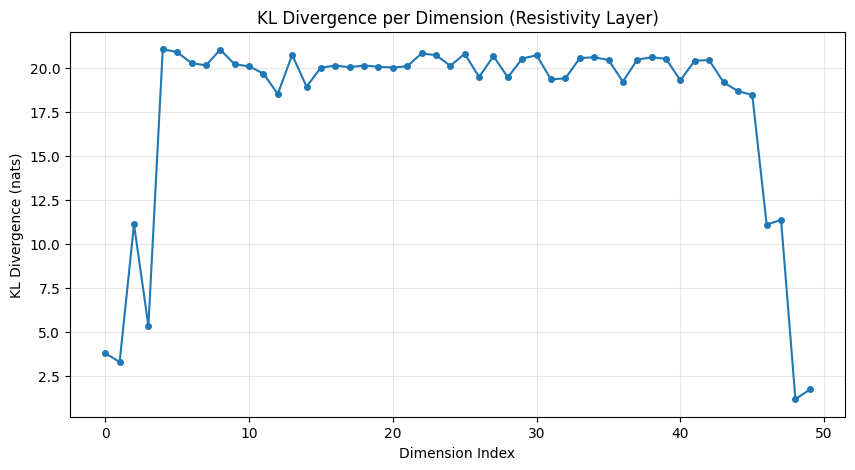

In [44]:
# Run the evaluation
# Note: batch_size is set to 32 to keep execution time reasonable on CPU.
kl_val, kl_per_dim = compute_kl_divergence(model, dataset, batch_size=32, T=T, device=device)
print(f"\nAverage KL Divergence across all {len(kl_per_dim)} dimensions: {kl_val:.4f}")

# Plot the KL divergence per dimension
plt.figure(figsize=(10, 5))
plt.plot(kl_per_dim, marker='o', linestyle='-', markersize=4)
plt.title('KL Divergence per Dimension (Resistivity Layer)')
plt.xlabel('Dimension Index')
plt.ylabel('KL Divergence (nats)')
plt.grid(True, alpha=0.3)
plt.show()

In [45]:
# Run the calculation
mse_val, mse_individual = compute_mse(model, dataset, batch_size=32, T=T, device=device)

print(f"Mean Squared Error (averaged over batch): {mse_val:.6f}")
print(f"Min MSE in batch: {mse_individual.min().item():.6f}")
print(f"Max MSE in batch: {mse_individual.max().item():.6f}")

Generating 32 samples for MSE computation... (T=1000)
Mean Squared Error (averaged over batch): 429.821472
Min MSE in batch: 11.427173
Max MSE in batch: 2022.572144


In [46]:
# Generate 10k samples to generate a visualization with

generated_x_samples = []
num_samples_to_generate = 10000

mass_samples = p_sample_loop_batch(model, y_cond_true_batch,
 (num_samples_to_generate, x_dim), T, device, num_samples = num_samples_to_generate)


999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
753
752
751
750


In [47]:
mass_samples.shape
torch.save(mass_samples, 'mass_samples_phys_diffusion.pt')


In [48]:
sample_idx = 120
# compare mean of samples to ground truth
y, x_actual = dataset[sample_idx]
print(x_actual.shape)
gen_mean = torch.squeeze(torch.mean(mass_samples, dim=1))
print(gen_mean.shape)

#compute NRMSE
squared_differences = (gen_mean - x_actual)**2
mean_squared_difference = torch.mean(squared_differences)
nrmse = (mean_squared_difference**0.5) / (max(x_actual) - min(x_actual))
nrmse

torch.Size([50])
torch.Size([50])


tensor(4.9924, device='cuda:0')